## Outlier Detection Percentile Winsorization

In [7]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load dataset
df = pd.read_csv('../Dataset/weight-height.csv')

In [4]:
# display the first few rows of the dataframe
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
# display the shape of the dataframe
df.shape

(10000, 3)

In [6]:
# display summary statistics of the 'Height' column
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

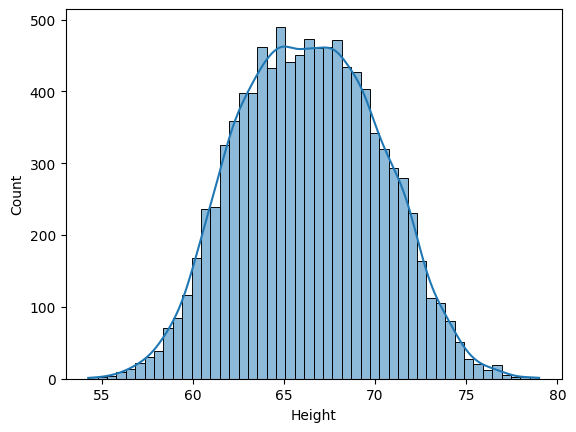

In [8]:
# visualize the distribution of the 'Height' column
sns.histplot(df['Height'], kde=True)
plt.show()

<Axes: xlabel='Height'>

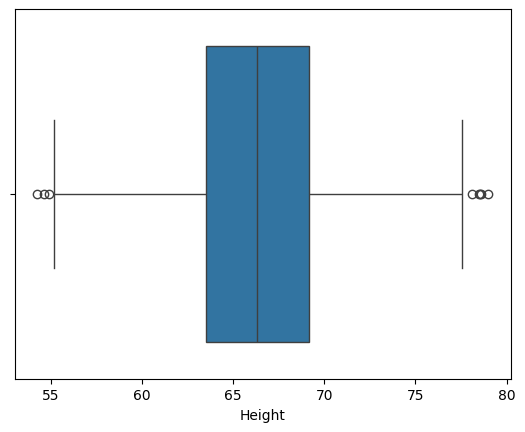

In [9]:
# visualize boxplot of the 'Height' column
sns.boxplot(df['Height'], orient='h')

In [10]:
# calculate the 1st and 99th percentiles for the 'Height' column
upper_limit = df['Height'].quantile(0.99)
lower_limit = df['Height'].quantile(0.01)

In [11]:
# print the calculated limits
print("upper_limit", upper_limit)
print("lower_limit", lower_limit)

upper_limit 74.7857900583366
lower_limit 58.13441158671655


In [12]:
# filter the dataframe to include only rows within the 1st and 99th percentiles
new_df = df[(df['Height'] <= 74.84) & (df['Height'] >= 58.13)]

In [13]:
# display summary statistics of the 'Height' column in the new dataframe
new_df['Height'].describe()

count    9804.000000
mean       66.367811
std         3.648317
min        58.134496
25%        63.577681
50%        66.320524
75%        69.121955
max        74.824945
Name: Height, dtype: float64

In [14]:
# display summary statistics of the 'Height' column
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

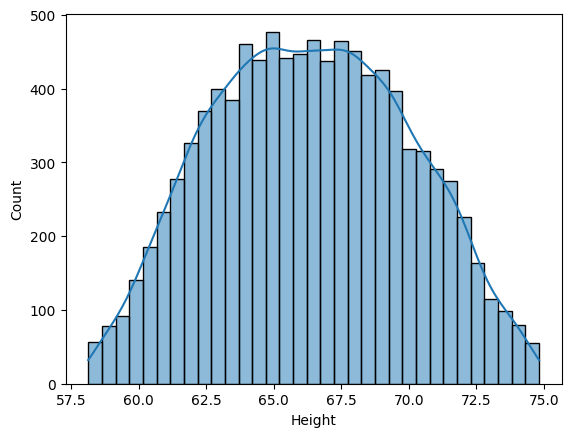

In [15]:
# visualize the distribution of the 'Height' column in the new dataframe
sns.histplot(new_df['Height'], kde=True)

<Axes: xlabel='Height'>

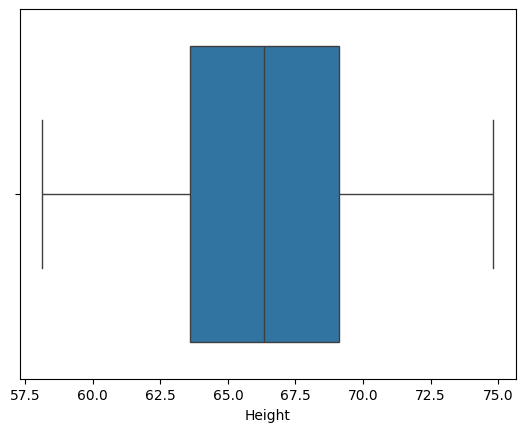

In [16]:
# visualize boxplot of the 'Height' column in the new dataframe
sns.boxplot(new_df['Height'], orient='h')

In [ ]:
# capping --> winsorizarion
df['Height'] = np.where(df['Height'] >= upper_limit, upper_limit,
         np.where(df['Height'] <= lower_limit, lower_limit, 
         df['Height']))

In [ ]:
df.shape

(10000, 3)

<Axes: xlabel='Height', ylabel='Count'>

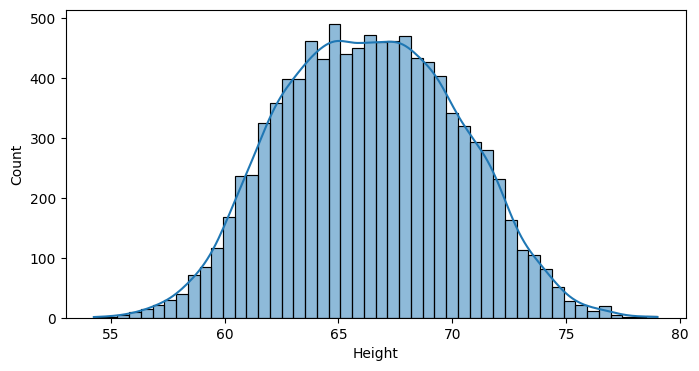

In [17]:
# visualize the distribution of the 'Height' column after winsorization
plt.figure(figsize=(8,4))
sns.histplot(df["Height"], kde=True)